<a href="https://colab.research.google.com/github/vRodrigues22/Atividades__Fundamentos_da_Inteligencia_Computacional_e_Ciencias_de_Dados/blob/main/Revisao_Geral_Estatistica_Aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Revisão Geral de Estatística Aplicada



---

## ÍNDICE

1. Medidas de Tendência Central
2. Medidas de Dispersão
3. Visualização de Dados: Histogramas e Box Plot
4. Medidas Populacionais vs Amostrais
5. Z-Score e Padronização de Dados
6. Distribuição Binomial
7. Distribuição Normal e Teorema do Limite Central
8. Distribuições Amostrais e das Médias Amostrais
9. Intervalos de Confiança
10. Testes de Hipótese: t-Test, t-Student, F-Statistic
11. Correlação, R² e Regressão Linear
12. PCA - Análise de Componentes Principais
13. Erros Tipo I, Tipo II e Falsos Negativos

---

## 1. Medidas de Tendência Central

### Conceitos

As medidas de tendência central são estatísticas que representam um valor típico ou central dentro de um conjunto de dados. Elas ajudam a resumir os dados com um único número que caracteriza o centro de uma distribuição. As principais medidas são:

* **Média**: soma dos valores dividida pelo número de observações.
* **Mediana**: valor que separa a metade superior da metade inferior dos dados ordenados.
* **Moda**: valor mais frequente em um conjunto de dados.



### Fórmulas

* Média: $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$
* Mediana: depende se n é ímpar (valor central) ou par (média dos dois centrais).
* Moda: valor com maior frequência absoluta.

### Exemplo Numérico

Dado o conjunto: [5, 7, 8, 9, 10, 10, 10, 11, 13, 15]

* **Média** = (5+7+8+9+10+10+10+11+13+15)/10 = 98/10 = 9,8
* **Mediana** = (10 + 10)/2 = 10 (valores centrais)
* **Moda** = 10 (ocorre 3 vezes)

### Exemplo com Python







In [ ]:
import numpy as np
from scipy import stats

dados = [5, 7, 8, 9, 10, 10, 10, 11, 13, 15]
print("Média:", np.mean(dados))
print("Mediana:", np.median(dados))
print("Moda:", stats.mode(dados, keepdims=True).mode[0])

Média: 9.8
Mediana: 10.0
Moda: 10




---



## 2. Medidas de Dispersão

### Conceitos

As medidas de dispersão descrevem o grau de variação ou espalhamento dos dados em relação à média. Elas complementam as medidas de tendência central, indicando o quão concentrados ou dispersos os dados estão.

* **Amplitude**: diferença entre maior e menor valor.
* **Variância**: média dos quadrados dos desvios da média.
* **Desvio padrão**: raiz quadrada da variância.
* **Intervalo interquartil (IQR)**: diferença entre o terceiro e o primeiro quartil (Q3 - Q1).

### Fórmulas

* Variância amostral: $s^2 = \frac{1}{n-1} \sum (x_i - \bar{x})^2$
* Desvio padrão: $s = \sqrt{s^2}$


###Exemplo Numérico

Conjunto de dados: [5, 7, 8, 9, 10, 10, 10, 11, 13, 15]

* **Amplitude**: 15 - 5 = 10
* **Variância amostral**: 8.62
* **Desvio padrão amostral**: 2.94
* **Quartis**: Q1 = 8.25, Q3 = 11 => IQR = 2.75

### Exemplo com Python



In [ ]:
print("Amplitude:", max(dados) - min(dados))
print("Variância amostral:", np.var(dados, ddof=1))
print("Desvio padrão amostral:", np.std(dados, ddof=1))
q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)
print("IQR:", q3 - q1)

Amplitude: 10
Variância amostral: 8.177777777777777
Desvio padrão amostral: 2.859681411936962
IQR: 2.5




---




## 3. Visualização de Dados: Histogramas e Box Plot

A visualização de dados é uma etapa essencial da análise estatística. Ela permite entender rapidamente padrões, tendências e possíveis anomalias nos dados. Entre os principais gráficos usados estão os histogramas e os box plots.

### Histogramas

Representam a distribuição de frequências por classes.

**Quando usar**

* Para dados quantitativos contínuos.
* Para entender distribuições assimétricas, modais, ou presença de outliers.

**Como interpretar**

* A forma do histograma pode indicar se os dados seguem uma distribuição normal (curva em forma de sino).
* Picos (modas), caudas e simetria/asimetria podem ser observados.


### Exemplo com Python





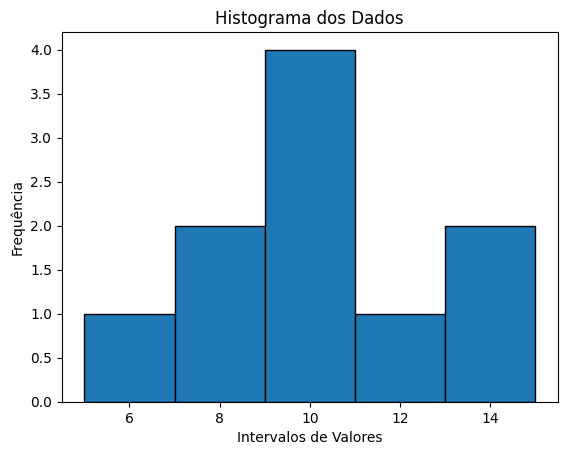

In [ ]:
plt.hist(dados, bins=5, edgecolor='black')
plt.title("Histograma dos Dados")
plt.xlabel("Intervalos de Valores")
plt.ylabel("Frequência")
plt.show()

### Box Plot

Representa a mediana, quartis, mínimo, máximo e outliers.

O box plot fornece um resumo visual da distribuição dos dados com base em cinco estatísticas:

* Valor mínimo (excluindo outliers)
* Primeiro quartil (Q1 - 25%)
* Mediana (Q2 - 50%)
* Terceiro quartil (Q3 - 75%)
* Valor máximo (excluindo outliers)

Ele também identifica outliers como pontos que estão além de 1,5 vezes o IQR (intervalo interquartil).

**Quando usar**

* Para comparar distribuições entre grupos.
* Para detectar assimetria, dispersão e valores extremos.

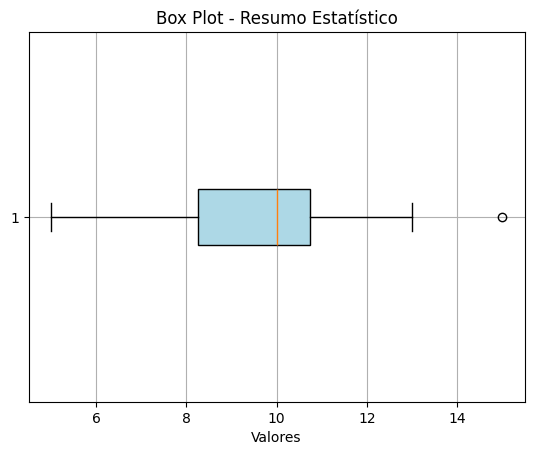

In [ ]:

plt.boxplot(dados, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot - Resumo Estatístico")
plt.xlabel("Valores")
plt.grid(True)
plt.show()

### Comparando Histogramas e Box Plots

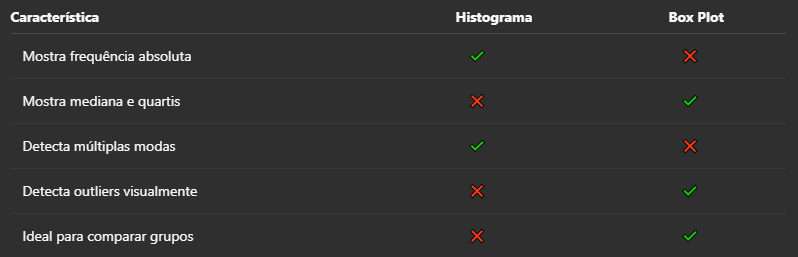




---



## 4. Medidas Populacionais vs Amostrais

### Conceito

As medidas de tendência central e dispersão podem ser calculadas tanto para populações quanto para amostras. A diferença está na fórmula usada e no objetivo: descrever dados (**população**) ou estimar parâmetros (**amostra**).


* **Média populacional (μ)**: valor médio dos dados da população.
* **Média amostral ($\bar{x}$)**: valor médio de uma amostra extraída da população.
* **Variância populacional ($\sigma^2$)**: medida da dispersão dos dados da população em relação à média.
* **Variância amostral ($s^2$)**: estimativa da variância populacional com base em uma amostra.
* **Desvio padrão**: raiz quadrada da variância, representa a dispersão dos dados em unidades originais.

### Fórmulas

* $\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$
* $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$
* $\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$
* $s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2$
* $\sigma = \sqrt{\sigma^2}$, $s = \sqrt{s^2}$


## Média Populacional e Proporção da População

### Conceitos

A média populacional e a proporção da população são dois parâmetros fundamentais para descrever e inferir características de uma população:

* **Média populacional**: média de uma variável contínua para todos os indivíduos da população.
* **Proporção da população (P)**: fração dos indivíduos que possuem uma característica específica.

### Fórmulas

* Média: $\mu = \frac{\sum x_i}{N}$
* Proporção: $P = \frac{X}{N}$, onde:

  * $X$ = número de indivíduos com a característica
  * $N$ = total da população

### Exemplo Prático

Uma cidade tem 1000 habitantes. Desses, 240 praticam atividade física regularmente. A proporção populacional de praticantes é:

$P = \frac{240}{1000} = 0,24 =$ 24%


### Exemplo com Python




Média populacional das idades: 35.1
Proporção de praticantes: 0.24 



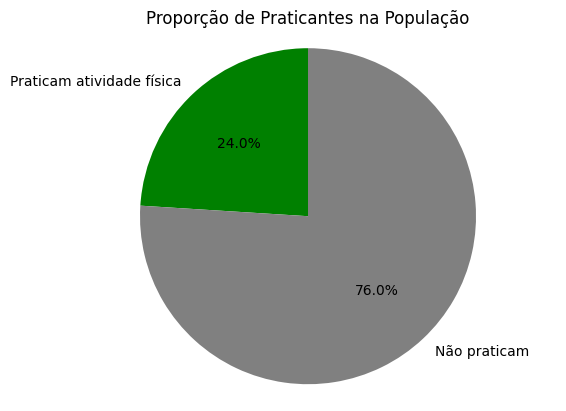

In [20]:
# Média e proporção em um contexto populacional
import numpy as np
import matplotlib.pyplot as plt

# Variável quantitativa: idade
idades = [22, 25, 27, 30, 34, 37, 40, 41, 45, 50]

# Média populacional
media_idade = np.mean(idades)
print("Média populacional das idades:", media_idade)

# Variável categórica: prática de atividade física
total = 1000
praticantes = 240
proporcao = praticantes / total
print("Proporção de praticantes:", proporcao, "\n")

# Visualização da Proporção
labels = ['Praticam atividade física', 'Não praticam']
valores = [proporcao, 1 - proporcao]

plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'gray'])
plt.title("Proporção de Praticantes na População")
plt.axis('equal')
plt.show()


### Diferenças entre População e Amostra

As análises estatísticas se baseiam em dois tipos de conjuntos de dados:

* População: o conjunto completo de indivíduos, itens ou dados sobre os quais queremos tirar conclusões.
* Amostra: um subconjunto da população, usado para estimar parâmetros populacionais quando não é possível observar todos os elementos da população.

Por isso, muitas medidas estatísticas possuem duas versões: a populacional e a amostral. Cada uma tem sua fórmula e uso específico.

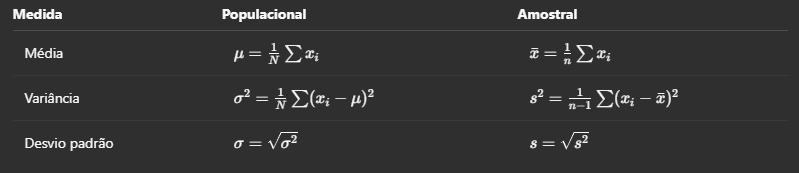

* N = tamanho da população
* n = tamanho da amostra

O uso de n - 1 na fórmula da variância amostral (e do desvio padrão) corrige o viés da estimativa, pois a média $\bar{x}$  é uma estimativa da média populacional e não o valor real de ${\mu}$. Esse ajuste é conhecido como correção de Bessel.

###Exemplo Numérico

Dado o conjunto populacional: [5, 7, 8, 9, 10, 10, 10, 11, 13, 15]

* Média populacional ($\bar{x}$) = 9,8
* Variância populacional ($\sigma^2$) = 8,16
* Desvio padrão populacional ($\sigma$) ≈ 2,86
* Variância amostral ($s^2$) = 9,07
* Desvio padrão amostral ($s$) ≈ 3,01

### Exemplo com Python

In [ ]:
import numpy as np
populacao = [5, 7, 8, 9, 10, 10, 10, 11, 13, 15]

# Populacional (ddof=0)
media_pop = np.mean(populacao)
variancia_pop = np.var(populacao, ddof=0)
desvio_pop = np.std(populacao, ddof=0)

# Amostral (ddof=1)
variancia_amostral = np.var(populacao, ddof=1)
desvio_amostral = np.std(populacao, ddof=1)

print("Média populacional:", media_pop)
print("Variância populacional:", variancia_pop)
print("Desvio padrão populacional:", desvio_pop)
print("Variância amostral:", variancia_amostral)
print("Desvio padrão amostral:", desvio_amostral)

Média populacional: 9.8
Variância populacional: 7.359999999999999
Desvio padrão populacional: 2.7129319932501073
Variância amostral: 8.177777777777777
Desvio padrão amostral: 2.859681411936962


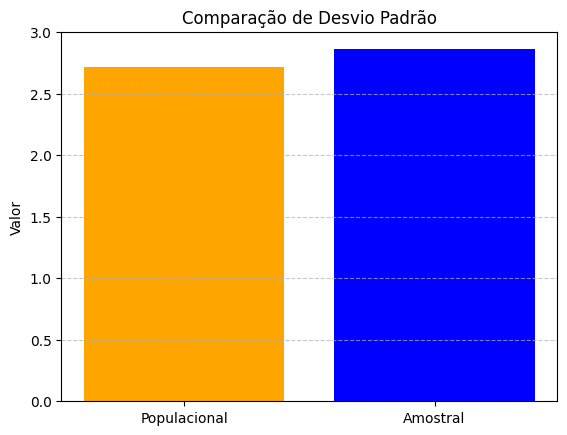

In [16]:
# Visualização Comparativa

import matplotlib.pyplot as plt

valores = [std_pop, std_amos]
nomes = ['Populacional', 'Amostral']
plt.bar(nomes, valores, color=['orange', 'blue'])
plt.title("Comparação de Desvio Padrão")
plt.ylabel("Valor")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



---



## 5. Z-Score e Padronização de Dados

### Conceito

O z-score (ou escore padronizado) indica quantos desvios padrão um valor está distante da média de um conjunto de dados. Ele é fundamental para comparar valores entre distribuições diferentes ou verificar a normalidade.

### Fórmula

$z = \frac{x - \mu}{\sigma}$


* **x** = valor observado
* **${\mu}$** = média populacional (ou amostral)
* **${\sigma}$** = desvio padrão populacional (ou amostral)

### Interpretação

* z = 0: o valor está exatamente na média

* z > 0: valor acima da média

* z < 0: valor abaixo da média

* |z| > 2: potencial outlier (depende do contexto)

### Exemplo com Python



Z-scores: [np.float64(-1.6785086548325652), np.float64(-0.9791300486523298), np.float64(-0.6294407455622121), np.float64(-0.2797514424720944), np.float64(0.06993786061802329), np.float64(0.06993786061802329), np.float64(0.06993786061802329), np.float64(0.41962716370814096), np.float64(1.1190057698883764), np.float64(1.8183843760686118)]


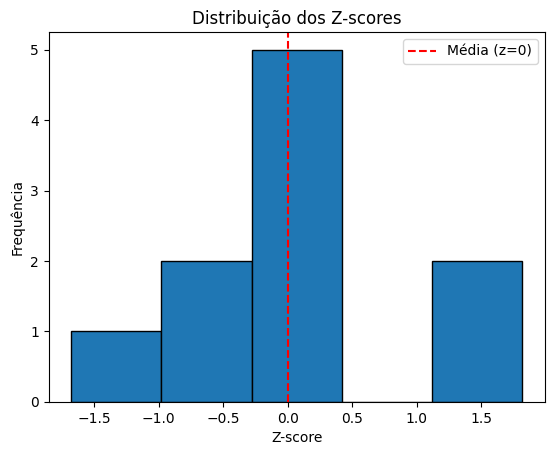

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de dados
dados = [5, 7, 8, 9, 10, 10, 10, 11, 13, 15]

# Padronizando os dados
media = np.mean(dados)
desvio = np.std(dados, ddof=1)

# Evitar divisão por zero
if desvio != 0:
    z_scores = [(x - media) / desvio for x in dados]
    print("Z-scores:", z_scores)
else:
    print("Desvio padrão é zero. Z-score não pode ser calculado.")


# Vizualização
if 'z_scores' in locals():
    plt.hist(z_scores, bins=5, edgecolor='black')
    plt.axvline(0, color='red', linestyle='--', label='Média (z=0)')
    plt.title("Distribuição dos Z-scores")
    plt.xlabel("Z-score")
    plt.ylabel("Frequência")
    plt.legend()
    plt.show()
else:
    print("Variável 'z_scores' não definida. Execute o cálculo dos z-scores antes de visualizar.")



---



## 6. Distribuição Binomial

### Conceito

A distribuição binomial é uma distribuição de probabilidade discreta que descreve o número de sucessos em uma sequência de n ensaios de Bernoulli, nos quais cada ensaio tem apenas dois resultados possíveis: **sucesso** ou **fracasso**.

É apropriada para situações como:

* Jogar uma moeda várias vezes e contar o número de caras.
* Realizar testes de qualidade em produtos (defeituoso ou não).
* Aplicações com eventos "sim/não", "verdadeiro/falso", "presente/ausente".

### Parâmetros

* $n$: número de tentativas

* $p$: probabilidade de sucesso

* $q = 1 - p$: probabilidade de fracasso

* $X$: número de sucessos

### Fórmula

$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$

* $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ é o coeficiente binomial

* $k$: número de sucessos (0 ≤ k ≤ n)

### Esperança e Variância

* Esperança: $E(X) = n \cdot p$

* Variância: $n \cdot p \cdot (1 - p)$

### Exemplo com Python





P(X=0) = 0.0010
P(X=1) = 0.0098
P(X=2) = 0.0439
P(X=3) = 0.1172
P(X=4) = 0.2051
P(X=5) = 0.2461
P(X=6) = 0.2051
P(X=7) = 0.1172
P(X=8) = 0.0439
P(X=9) = 0.0098
P(X=10) = 0.0010


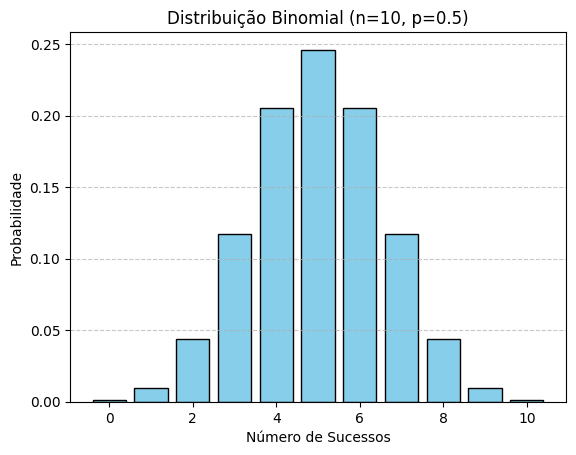

In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n = 10      # número de ensaios
p = 0.5     # probabilidade de sucesso
x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

# Impressão dos valores
for k, prob in zip(x, pmf):
    print(f"P(X={k}) = {prob:.4f}")

# Gráfico
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title("Distribuição Binomial (n=10, p=0.5)")
plt.xlabel("Número de Sucessos")
plt.ylabel("Probabilidade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



---



## 7. Distribuição Normal e Teorema do Limite Central

### a) Distribuição Normal

A distribuição normal, também conhecida como distribuição gaussiana, é uma distribuição de probabilidade contínua que tem a forma de um sino. É a base de muitos métodos estatísticos devido às suas propriedades matemáticas e à sua frequência em fenômenos naturais.

###Características

* Simétrica em torno da média $\mu$

* Média, mediana e moda são iguais
* Total da área sob a curva é 1 (100%)
* Curva se aproxima do eixo x, mas nunca o toca

### Fórmula

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$

Onde:
* *x*: variável contínua
* $\mu$: média
* $\sigma$: desvio padrão

### Propriedades da Curva Normal

* Aproximadamente 68% dos dados estão entre $\mu \pm 1\sigma$
* Aproximadamente 95% entre $\mu \pm 2\sigma$
* Aproximadamente 99,7% entre $\mu \pm 3\sigma$

Essa regra é chamada de regra empírica ou regra 68-95-99.7.

### Exemplo com Python




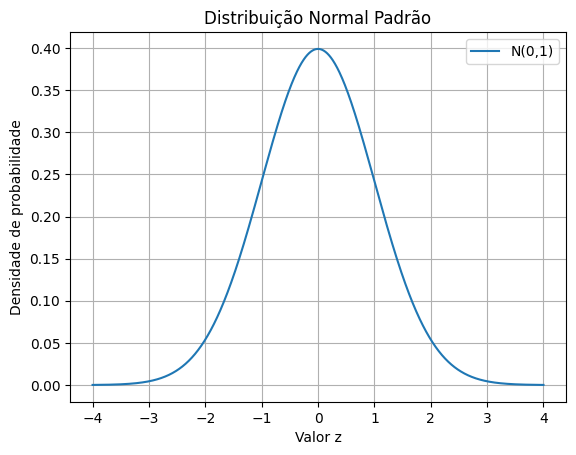

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

plt.plot(x, y, label='N(0,1)')
plt.title("Distribuição Normal Padrão")
plt.xlabel("Valor z")
plt.ylabel("Densidade de probabilidade")
plt.grid(True)
plt.legend()
plt.show()

### b) Teorema do Limite Central (TLC)

O Teorema do Limite Central afirma que a distribuição das médias amostrais de variáveis independentes, com distribuição qualquer (desde que tenham média e variância finitas), tende à distribuição normal conforme o tamanho da amostra aumenta.

* Mesmo que os dados originais não sejam normais, a média de amostras suficientemente grandes seguirá uma normal.

* Justifica o uso da normal em muitas situações da inferência estatística.

### Exemplo com Python

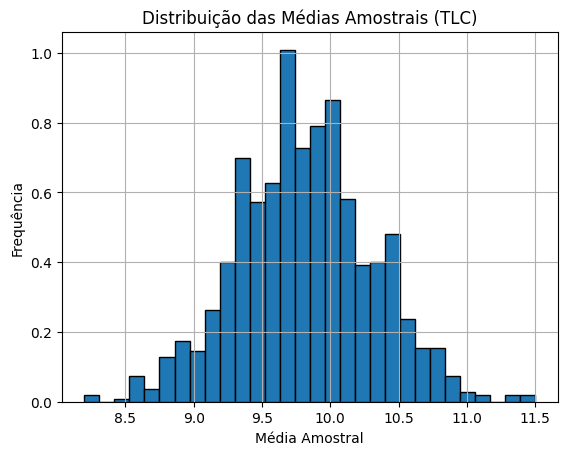

In [ ]:
import random
medias = [np.mean(random.choices(dados, k=30)) for _ in range(1000)]

plt.hist(medias, bins=30, edgecolor='black', density=True)
plt.title("Distribuição das Médias Amostrais (TLC)")
plt.xlabel("Média Amostral")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()



---



## 8. Distribuições Amostrais e das Médias Amostrais

### Conceito

Uma distribuição amostral descreve como uma estatística (como a média, proporção, variância) varia entre todas as amostras possíveis de mesmo tamanho extraídas de uma população.

A mais conhecida é a distribuição amostral da média, que mostra a distribuição das médias das amostras aleatórias de um mesmo tamanho.

### Diferença entre Distribuição de Dados e Distribuição Amostral

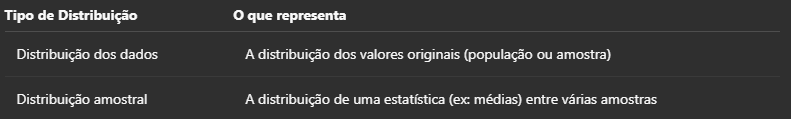

### Parâmetros da Distribuição Amostral da Média

* Média da distribuição amostral: $\mu_\bar{x} = \mu$

* Desvio padrão da distribuição amostral (erro padrão):  $\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$


Onde:

* $\mu$: média da população
* $\sigma$: desvio padrão da população
* *n*: tamanho da amostra

Quanto maior o tamanho da amostra n, menor o erro padrão $\sigma_\bar{x}$.

A forma da distribuição amostral da média se aproxima da normal à medida que n aumenta (Teorema do Limite Central).

### Exemplo com Python



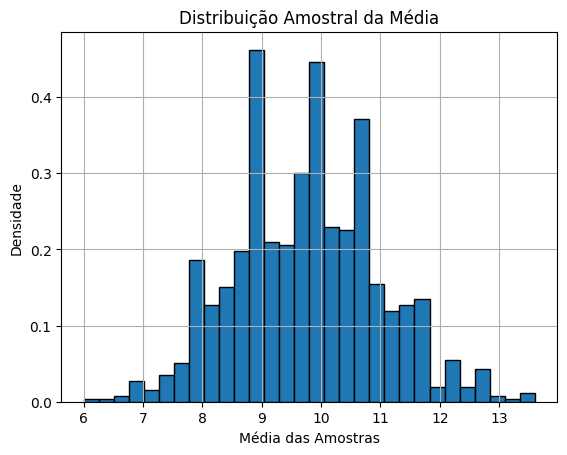

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Simulando distribuição amostral da média
populacao = [5, 7, 8, 9, 10, 10, 10, 11, 13, 15]
medias_amostrais = [np.mean(random.choices(populacao, k=5)) for _ in range(1000)]

plt.hist(medias_amostrais, bins=30, edgecolor='black', density=True)
plt.title("Distribuição Amostral da Média")
plt.xlabel("Média das Amostras")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()



---




## 9. Intervalos de Confiança

### Conceito

Um intervalo de confiança (IC) é um intervalo estimado ao redor de um parâmetro populacional (como a média ou proporção), baseado em dados amostrais, que tem uma probabilidade específica (nível de confiança) de conter o valor verdadeiro do parâmetro.

Em outras palavras, é uma forma de expressar a incerteza da estimativa baseada em amostras.

### Fórmula

$IC = \bar{x} \pm z \cdot \frac{s}{\sqrt{n}}$

Quando $\sigma$ (desvio padrão populacional) não é conhecido, usamos a distribuição *t* de Student: $IC = \bar{x} \pm t_\alpha/2 \cdot \frac{s}{\sqrt{n}}$

Onde:

* $\bar{x}$: média amostral
* *z*: escore z para o nível de confiança desejado (ex: 1.96 para 95%)
* $t_\alpha/2$: valor crítico da distribuição t
* $σ$ ou $s$: desvio padrão populacional ou amostral
* *n*: tamanho da amostra

### Níveis de Confiança Comuns

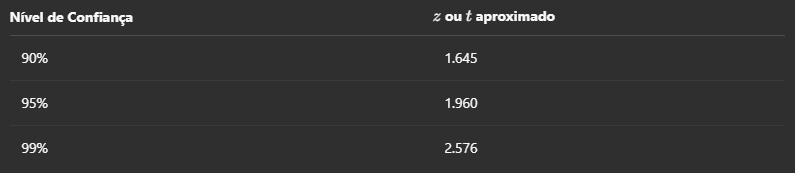

> Com distribuição *t*, o valor depende dos graus de liberdade (n - 1)

### Exemplo com Python



Intervalo de Confiança 95%: (7.75, 11.85)



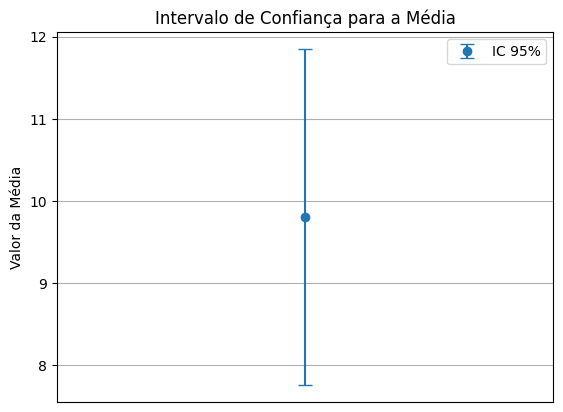

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Amostra de dados
dados = [5, 7, 8, 9, 10, 10, 10, 11, 13, 15]
n = len(dados)
media = np.mean(dados)
desvio_amostral = np.std(dados, ddof=1)
sem = stats.sem(dados)  # erro padrão da média
t_score = stats.t.ppf(0.975, df=n-1)  # t para 95% de confiança

# Intervalo de confiança
margem_erro = t_score * sem
ic_inferior = media - margem_erro
ic_superior = media + margem_erro

print(f"Intervalo de Confiança 95%: ({ic_inferior:.2f}, {ic_superior:.2f})\n")


# Visualização
plt.errorbar(1, media, yerr=margem_erro, fmt='o', capsize=5, label='IC 95%')
plt.xlim(0, 2)
plt.xticks([])
plt.title("Intervalo de Confiança para a Média")
plt.ylabel("Valor da Média")
plt.grid(True)
plt.legend()
plt.show()



---




## 10. Testes de Hipótese: t-Test, t-Student, F-Statistic

### Conceito

Um teste de hipótese é uma metodologia estatística usada para tomar decisões com base em dados amostrais. Ele envolve a formulação de duas hipóteses:

* Hipótese nula ($H_0$): pressupõe que não há diferença ou efeito.
* Hipótese alternativa ($H_1$): indica que há uma diferença ou efeito.

### Etapas de um Teste de Hipótese


1.  Formular $H_0$ e $H_1$
2.  Escolher o nível de significância $α$ (ex: 0,05)
3.  Calcular a estatística do teste
4.  Comparar com o valor crítico ou calcular o *p-valor*
5.  Tomar a decisão: rejeitar ou não rejeitar $H_0$


## a) Teste t de Student

Usado para comparar médias em duas situações:

* Comparação de uma média com um valor conhecido
* Comparação entre duas médias de amostras independentes

### Fórmulas

* Estatística t para uma amostra: $t = \frac {\bar{x}-\mu_0}{s / \sqrt{n}
} $
* Estatística t para duas amostras independentes: $t = \frac {\bar{x}_1-\bar{x}_2}{\sqrt{\frac {s_{1}^{2}}{n1} + \frac {s_{2}^{2}}{n2}}
} $


### Exemplo com Python  – t-Test para duas amostras




In [ ]:
from scipy.stats import ttest_ind

# Dois grupos de dados
grupo1 = [10, 11, 12, 13, 14]
grupo2 = [8, 9, 10, 11, 12]

# Teste t independente
t_stat, p_valor = ttest_ind(grupo1, grupo2)

print("t-statistic:", t_stat)
print("p-valor:", p_valor)

t-statistic: 2.0
p-valor: 0.08051623795726257


## b) F-Statistic

Usada principalmente na **ANOVA** (Análise de Variância), para testar a igualdade de mais de duas médias.

Fórmula Geral da Estatística F

$F = \frac {Variância entre grupos}{Variância dentro dos grupos}$

* Um valor F elevado sugere que as médias dos grupos não são todas iguais.

### Exemplo com Python  – F-Statistic para três amostras

In [ ]:
from scipy.stats import f_oneway

# Três grupos de dados
g1 = [9, 10, 11, 12]
g2 = [14, 15, 16, 15]
g3 = [20, 19, 21, 22]

f_stat, p_valor = f_oneway(g1, g2, g3)

print("F-statistic:", f_stat)
print("p-valor:", p_valor)

F-statistic: 75.25000000000018
p-valor: 2.4080649651491885e-06




---




## 11. Correlação, R² e Regressão Linear

###Correlação

A correlação mede a força e a direção da relação linear entre duas variáveis quantitativas. O coeficiente mais comum é o de correlação de Pearson .

* $r = +1$: correlação positiva perfeita

* $r = -1$: correlação negativa perfeita

* $r = 0$: nenhuma correlação linear

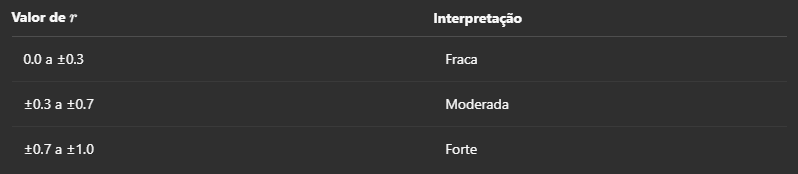

> Obs: Correlação não implica causalidade!


### Exemplo com Python



In [6]:
import numpy as np
from scipy.stats import pearsonr

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

r, p_valor = pearsonr(x, y)
print("Coeficiente de correlação (r):", r)
print("p-valor:", p_valor)

Coeficiente de correlação (r): 0.7745966692414834
p-valor: 0.1240270626575546


### R² – Coeficiente de Determinação

O coeficiente de determinação $R^2$ representa a proporção da variabilidade da variável dependente que pode ser explicada pelo modelo de regressão linear.

Varia de 0 a 1

* $R^2 =1$: ajuste perfeito
* $R^2 =0$: nenhum poder explicativo

### Regressão Linear Simples

A regressão linear simples estima uma relação linear entre:

* uma variável independente ($x$) e
* uma variável dependente ($y$)

Equação da reta: $y = a + bx$

 Onde:

* $a$: intercepto
* $b$: coeficiente angular (inclinação)

### Exemplo com Python

Inclinação (b): 0.6000000000000001
Intercepto (a): 2.1999999999999997
Coeficiente de correlação (r): 0.7745966692414835
R²: 0.6000000000000002


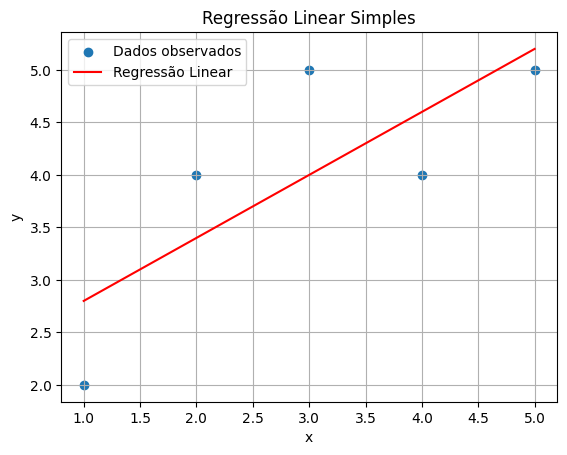

In [5]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

reg = linregress(x, y)
print("Inclinação (b):", reg.slope)
print("Intercepto (a):", reg.intercept)
print("Coeficiente de correlação (r):", reg.rvalue)
print("R²:", reg.rvalue**2)

# Visualização
y_pred = [reg.intercept + reg.slope * xi for xi in x]
plt.scatter(x, y, label='Dados observados')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão Linear Simples")
plt.legend()
plt.grid(True)
plt.show()



---



## 12. PCA - Análise de Componentes Principais

### Conceito

A Análise de Componentes Principais (PCA – Principal Component Analysis) é uma técnica estatística de redução de dimensionalidade usada para transformar um conjunto de variáveis possivelmente correlacionadas em um conjunto menor de componentes principais que explicam a maior parte da variância dos dados.

### É muito usada em:

* Exploração de dados
* Visualização em 2D/3D
* Pré-processamento para algoritmos de aprendizado de máquina

### Objetivos do PCA

* Reduzir o número de variáveis mantendo o máximo de informação possível
* Remover redundâncias (correlações) entre variáveis
* Encontrar novas variáveis (componentes) não correlacionadas

## Como Funciona

* Padroniza os dados (transforma para média 0 e variância 1)
* Calcula a matriz de covariância
* Encontra os autovalores e autovetores da matriz
* Ordena os autovalores e seleciona os principais
* Projeta os dados no novo espaço com menor dimensão

### Exemplo com Python




Variância explicada por cada componente: [0.96982031 0.03017969] 



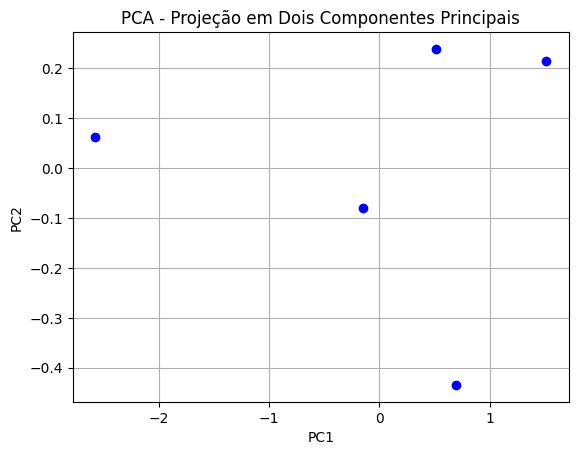

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dados simulados
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0]])

# Padronização
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variância explicada
print("Variância explicada por cada componente:", pca.explained_variance_ratio_, "\n")

# Visualização
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.title("PCA - Projeção em Dois Componentes Principais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()




---



## 13. Erros Tipo I, Tipo II e Falsos Negativos

### Conceitos

Em testes de hipótese, podem ocorrer dois tipos de erros ao tomar uma decisão sobre a hipótese nula ($H_0$):

* **Erro tipo I ($\alpha$)**: rejeitar $H_0$ quando ela é verdadeira.
* **Erro tipo II ($\beta$)**: não rejeitar $H_0$ quando ela é falsa.

Esses erros têm implicações práticas importantes na análise estatística, especialmente em áreas como saúde, engenharia, ciências sociais e aprendizado de máquina.

### Tabela Resumo
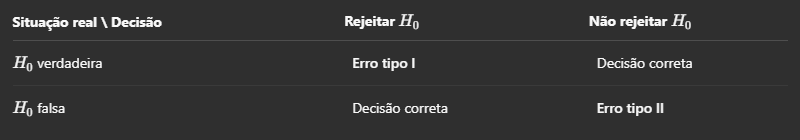


### Falsos Positivos e Falsos Negativos

* **Falso positivo** = Erro Tipo I: identificar um efeito que não existe.

* **Falso negativo** = Erro Tipo II: não identificar um efeito que existe.

  *  Falso negativo: um evento verdadeiro que o teste não detecta.

### Exemplo prático

**Teste de COVID-19**:

* Falso positivo: indicar que a pessoa tem COVID sem ter.

* Falso negativo: indicar que está saudável quando está infectada.

### Exemplo com Python



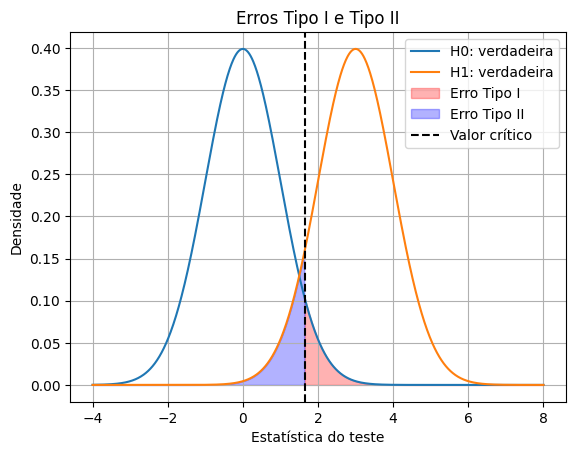

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-4, 8, 1000)
H0 = norm.pdf(x, 0, 1)
H1 = norm.pdf(x, 3, 1)

plt.plot(x, H0, label='H0: verdadeira')
plt.plot(x, H1, label='H1: verdadeira')
plt.fill_between(x, H0, where=(x > 1.64), color='red', alpha=0.3, label='Erro Tipo I')
plt.fill_between(x, H1, where=(x <= 1.64), color='blue', alpha=0.3, label='Erro Tipo II')
plt.axvline(1.64, color='black', linestyle='--', label='Valor crítico')
plt.title("Erros Tipo I e Tipo II")
plt.xlabel("Estatística do teste")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()